## Импорт библиотек

---

In [1]:
import os
import yaml

import cv2 as cv
import matplotlib.pyplot as plt

from IPython.display import clear_output

# %matplotlib notebook
%matplotlib inline

## Путь к файлам

---

In [2]:
dataset_path = 'dataset\\data'

part = 'train'

# Путь к папке с изображениями
images_path = os.path.join(dataset_path, part, 'images')
# Путь к папке с метками
labels_path = os.path.join(dataset_path, part, 'labels')
# Путь к файлу с классами
classes_path = os.path.join(dataset_path, 'data.yaml')

## Цикл по изображениям

---

0 447 276 117 41


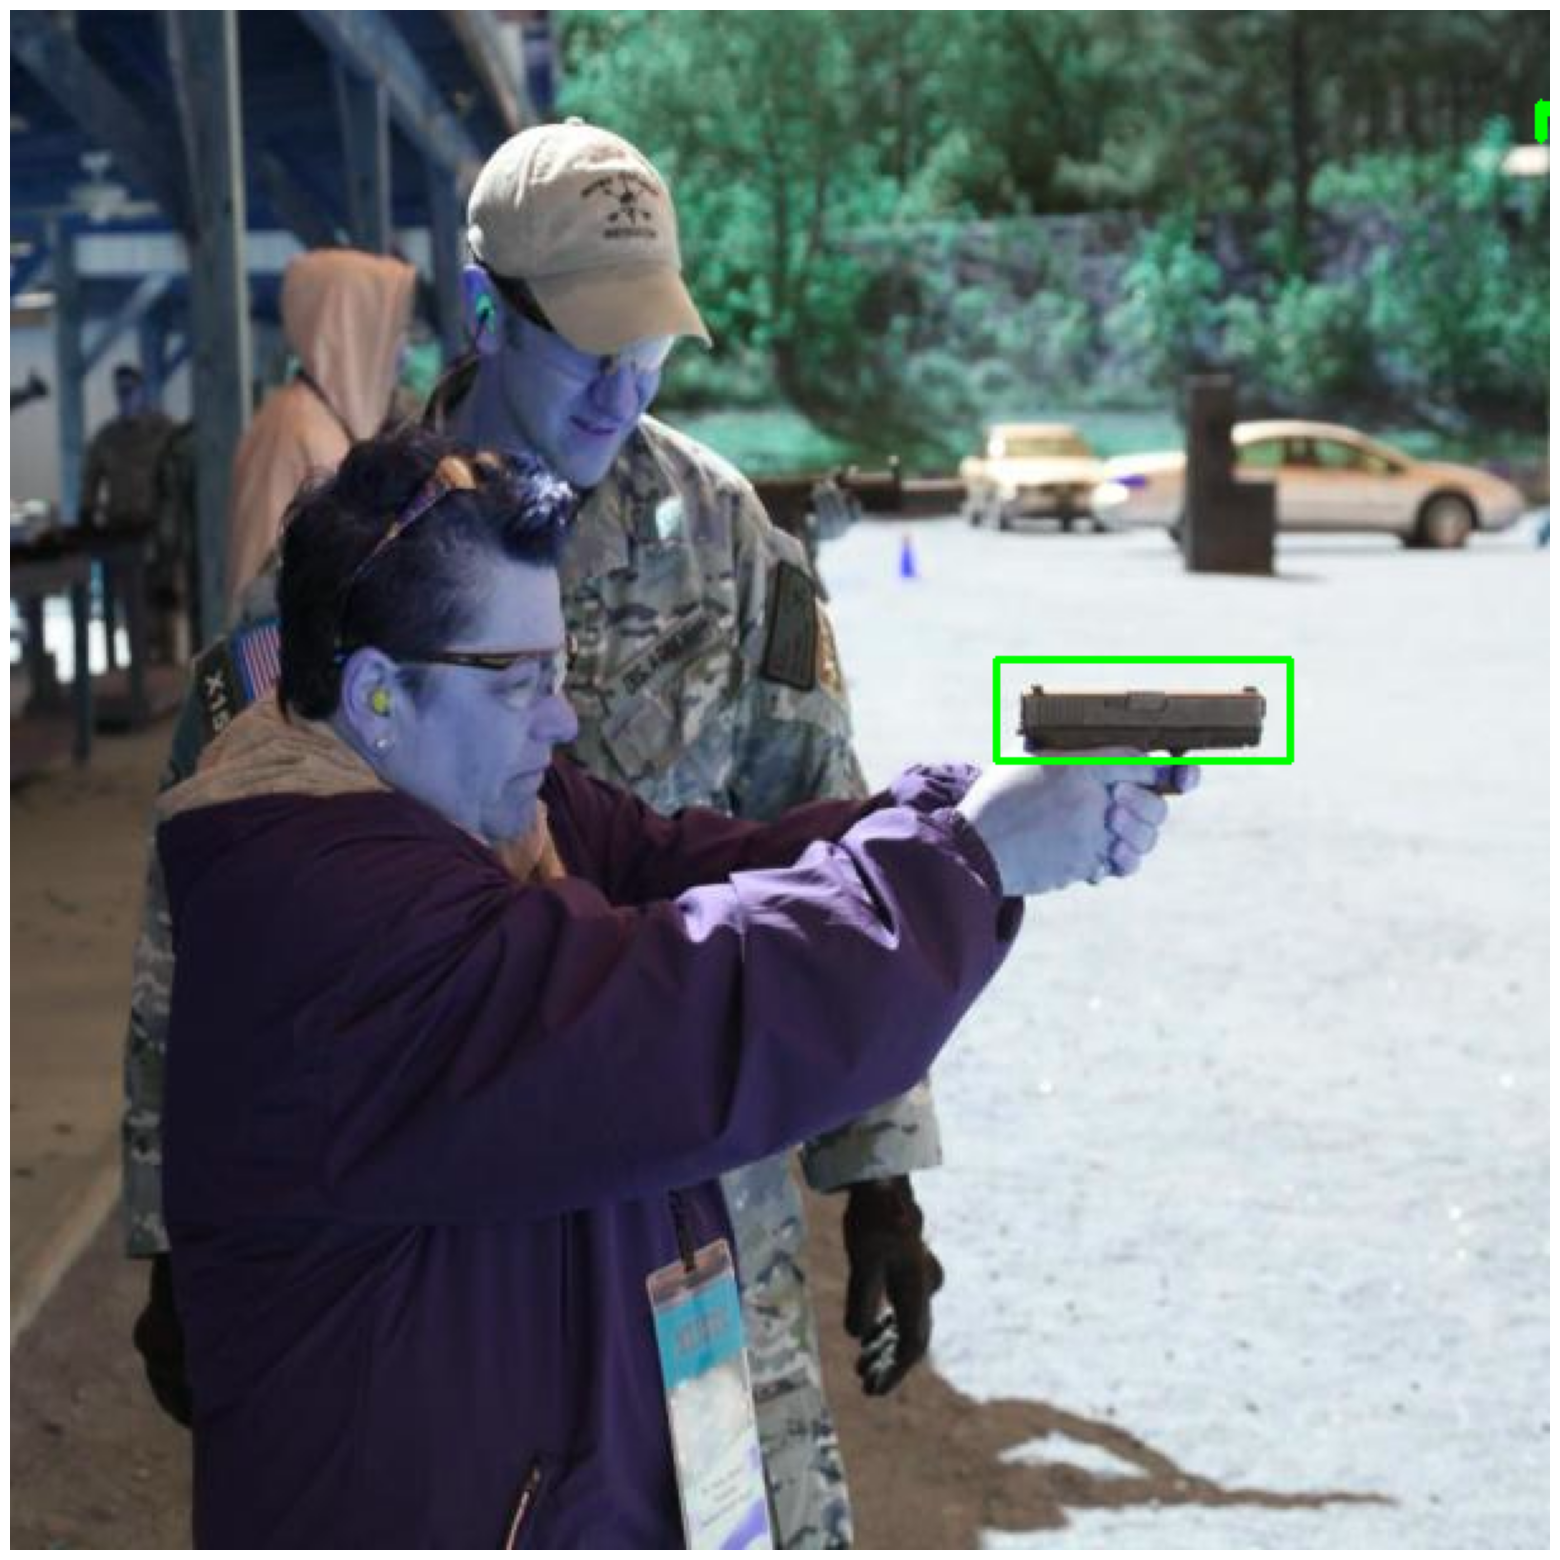

KeyboardInterrupt: Interrupted by user

In [4]:
# with open(classes_path, 'r') as file:
#     classes = yaml.safe_load(file)
# classes = classes['names']

exit = 0
for file_path in sorted(os.listdir(images_path)):
    img_path = images_path + '/' + file_path
    lbl_path = img_path.replace('images', 'labels').replace('.jpg', '.txt')
    coord = open(lbl_path).read().split('\n')

    high, width = cv.imread(img_path).shape[:2]
    print(high,width)
    while 1:
        clear_output(wait=True)
        #print("File path: ", file_path)
        
        img = cv.imread(img_path)
        #print(coord)
        if coord != ['']:
                for lst in coord:
                    lst = lst.split()
                    x, y, w, h = int(float(lst[1]) * width), int(float(lst[2]) * high), int(float(lst[3]) * width), int(float(lst[4]) * high)
                    print(lst[0], x, y, w, h)

                    cv.rectangle(
                        img, 
                        (x - w // 2, y - h // 2), 
                        (x + w // 2, y + h // 2), 
                        (0, 255, 0), 
                        2
                    )
                    cv.putText(
                        img, 
                        "n, x, y, w, h: " + f"{lst[0]} {x} {y} {w} {h}",
                        (600, 50 + 30 * int(lst[0])),
                        cv.FONT_HERSHEY_SIMPLEX, 0.9, 
                        (0, 255, 0), 
                        3
                    )

                plt.figure(figsize=(20, 20))
                plt.axis('off')
                plt.imshow(img, cmap='gray')
                plt.show()

                answer = input('Continue? (y/d/n/<n, x y w h>): ')
                if answer == 'n':
                    exit = 1
                    break
                elif answer == 'd':
                    os.remove(img_path)
                    os.remove(lbl_path)
                    break
                elif len(answer) > 1:
                    n, x, y, w, h = map(int, answer.split())
                    # Кодируем обратно в относительные координаты
                    n, x, y, w, h = n, x / width, y / high, w / width, h / high
                    if n < len(coord):
                        coord[n] = ' '.join(map(str, [n, x, y, w, h]))
                    else:
                        coord.append(' '.join(map(str, [n, x, y, w, h])))
                else:
                    with open(lbl_path, 'w') as f: 
                        f.write('\n'.join(coord))
                    break
        else:
            plt.figure(figsize=(20, 20))
            plt.axis('off')
            plt.imshow(img, cmap='gray')
            plt.show()
            answer = input('Continue? (y/d/n/<n, x y w h>): ')
            if answer == 'n':
                exit = 1
                break
            elif answer == 'd':
                os.remove(img_path)
                os.remove(lbl_path)
                break

    if exit:
        break

- **y*** - Переход к следующему элементу (можно оставлять пустым)
- **d** - Удаление элемента (удаляет файл изображения и его метку)
- **n** - Выход из цикла
- **<n, x y w h>** - Выбор области для метки в формате ```0 1413 796 40 77``` (номер изображения, x, y, ширина, высота)

**Примечание:** Если необходимо добавить новую метку, то нужно вставить следующий индекс по нумерации в **<n, x y w h>**.

#### Правила работы с box-ами

Координаты box-а задаются четырьмя числами: x1, y1, x2, y2. 

- x1, y1 - координаты левого верхнего угла, 
- x2, y2 - координаты правого нижнего угла.

Для смещения box-а:

- x1 += dx (смещение вправо на dx)
- y1 += dy (смещение вниз на dy)
- x2 += dx (увеличение ширины вправо на dx)
- y2 += dy (увеличение высоты вверх на dy)